#                                                           **Chocolate Sales**

### Library Importation


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
data = pd.read_csv("Chocolate Sales.csv")

In [4]:
data.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


## **Initial Exploration**

In [5]:
def rows_cols(x : pd.core.frame.DataFrame):

    print(f'The Number of Rows Present in the Data are {x.shape[0]}')
    print(f'The Number of Columns Present in the Data are {x.shape[1]}')

    

In [6]:
rows_cols(data)

The Number of Rows Present in the Data are 1094
The Number of Columns Present in the Data are 6


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Boxes Shipped,1094.0,161.797989,121.544145,1.0,70.0,135.0,228.75,709.0


In [9]:
data.select_dtypes(object).describe().T

,count,unique,top,freq
Sales Person,1094,25,Kelci Walkden,54
Country,1094,6,Australia,205
Product,1094,22,50% Dark Bites,60
Date,1094,168,13-Jan-22,16
Amount,1094,827,"$2,317",5


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Quarter'] = data['Date'].dt.quarter

In [11]:
data.drop(columns= 'Date', inplace=True)

In [12]:
data['Amount'] = data['Amount'].str.replace('[$,]', '', regex = True).astype(float)

In [13]:
data

,Sales Person,Country,Product,Amount,Boxes Shipped,Year,Month,Day,Quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,5320.0,180,2022,1,4,1
1,Van Tuxwell,India,85% Dark Bars,7896.0,94,2022,8,1,3
2,Gigi Bohling,India,Peanut Butter Cubes,4501.0,91,2022,7,7,3
3,Jan Morforth,Australia,Peanut Butter Cubes,12726.0,342,2022,4,27,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685.0,184,2022,2,24,1
...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,4410.0,323,2022,5,17,2
1090,Jehu Rudeforth,USA,White Choc,6559.0,119,2022,6,7,2
1091,Ches Bonnell,Canada,Organic Choco Syrup,574.0,217,2022,7,26,3
1092,Dotty Strutley,India,Eclairs,2086.0,384,2022,7,28,3


In [14]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped', 'Year',
       'Month', 'Day', 'Quarter'],
      dtype='object')

In [15]:
num_cols = ['Amount','Boxes Shipped','Day']

cat_cols = ['Sales Person', 'Country', 'Product','Year',
       'Month','Quarter']

## **Correlation Plot**

<Axes: >

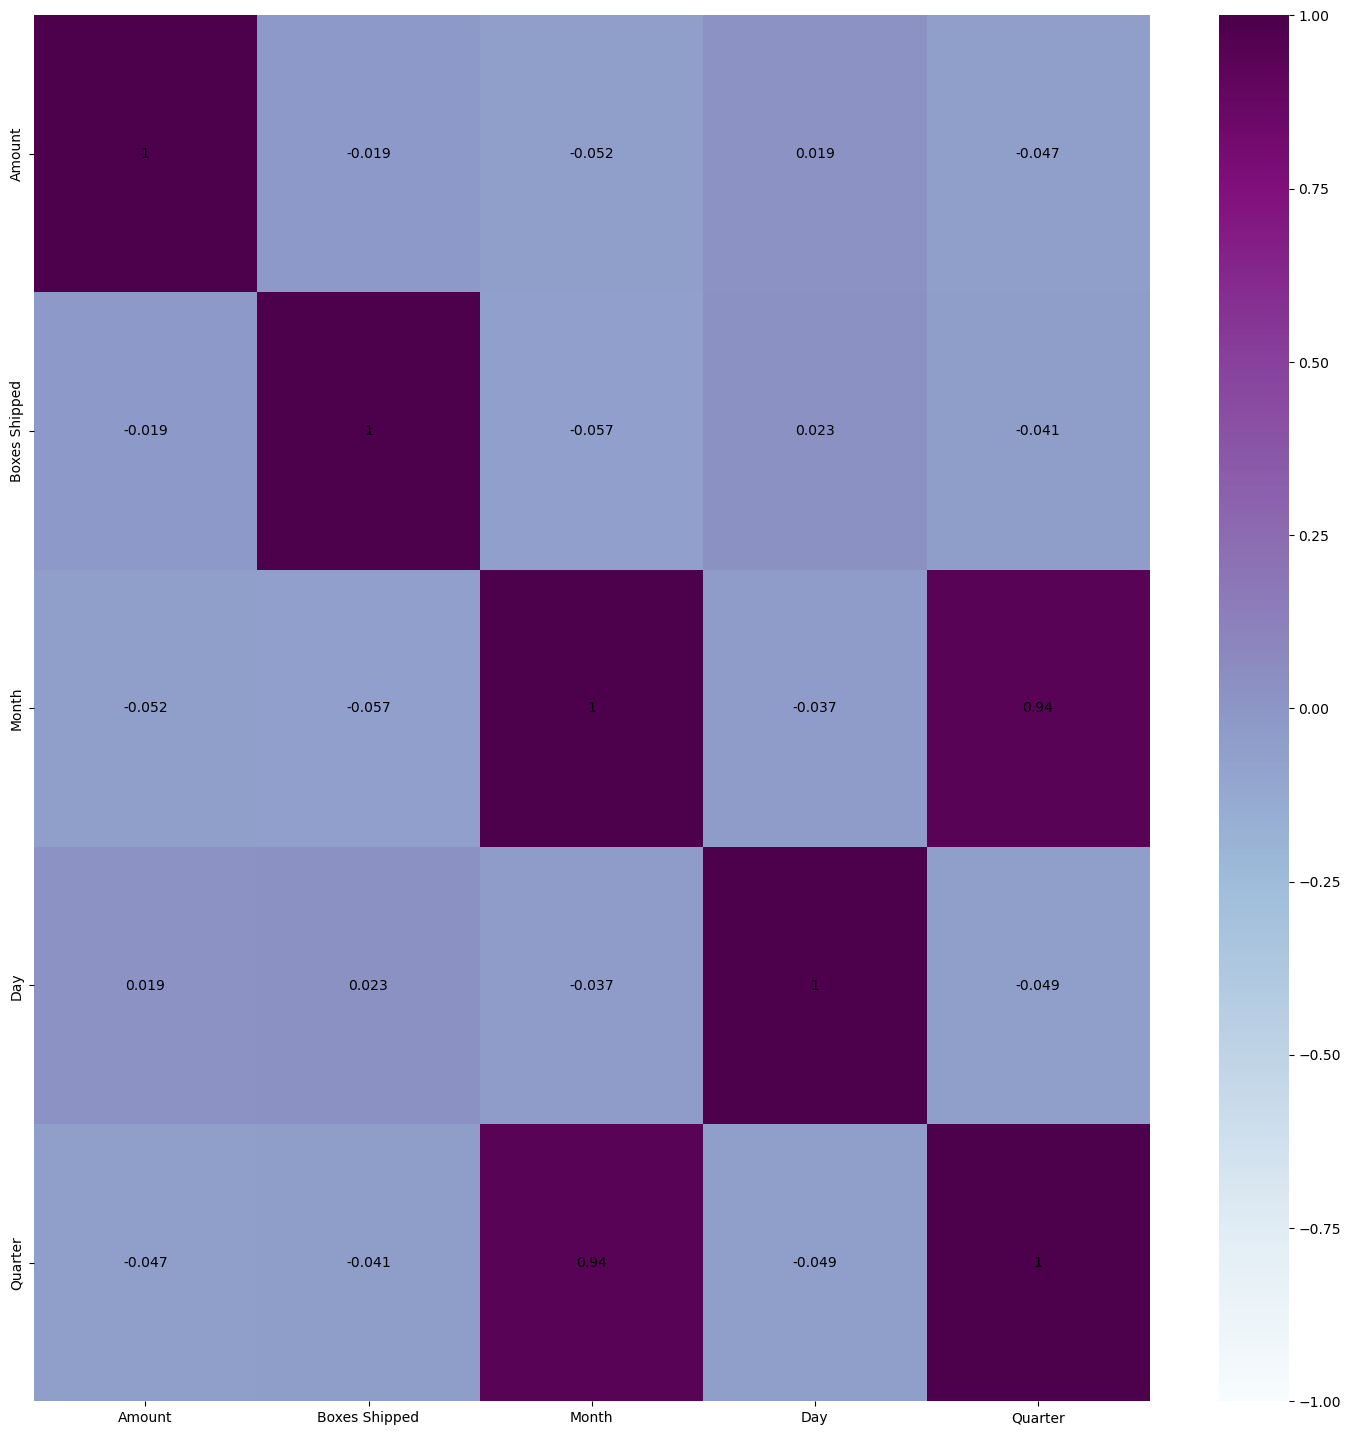

In [28]:
plt.figure(figsize = (18,18))
sns.heatmap(data = data.drop(columns = 'Year').corr(numeric_only=True), vmax=1, vmin= -1, cmap='BuPu', annot=True, annot_kws={'color' : 'black'}, linecolor='black')

## **Univariate Analysis**

### **On Numerical Columns**

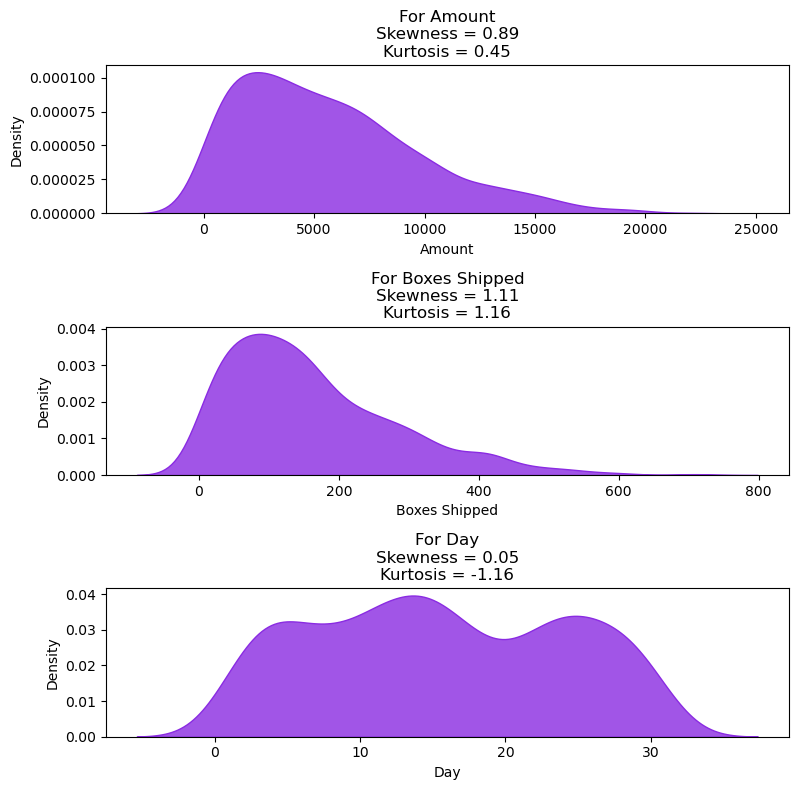

In [17]:
t = 1
plt.figure(figsize = (8,8))
for i in num_cols:
    plt.subplot(3,1,t)
    sns.kdeplot(data = data, x = i, fill = True, color='blueviolet', levels=100, alpha=0.8)
    plt.title(f'''For {i}
Skewness = {data[i].skew():.2f}
Kurtosis = {data[i].kurt():.2f}''')
    t = t+1
plt.tight_layout()
plt.show()
    

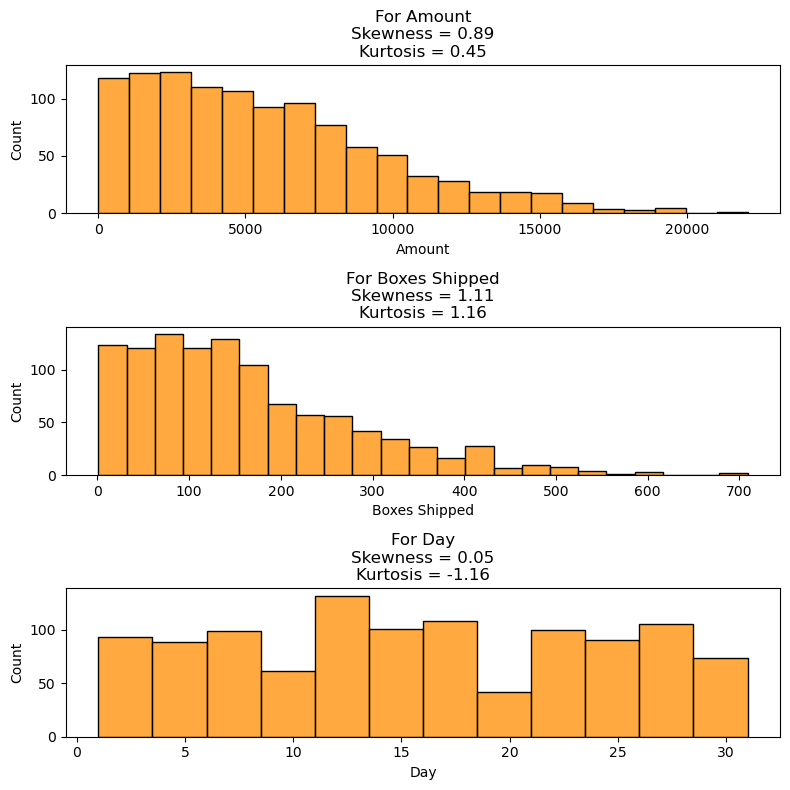

In [18]:
t = 1
plt.figure(figsize = (8,8))
for i in num_cols:
    plt.subplot(3,1,t)
    sns.histplot(data = data, x = i, color = 'darkorange')
    plt.title(f'''For {i}
Skewness = {data[i].skew():.2f}
Kurtosis = {data[i].kurt():.2f}''')
    t = t+1
plt.tight_layout()
plt.show()

INFERENCES :

- Most of the time Amount Paid is in range of 5000.

- Mostly 10-200 boxes are shipped.

- Most of the Sales Occured in Second week of the month.

### **On Categorical Columns**

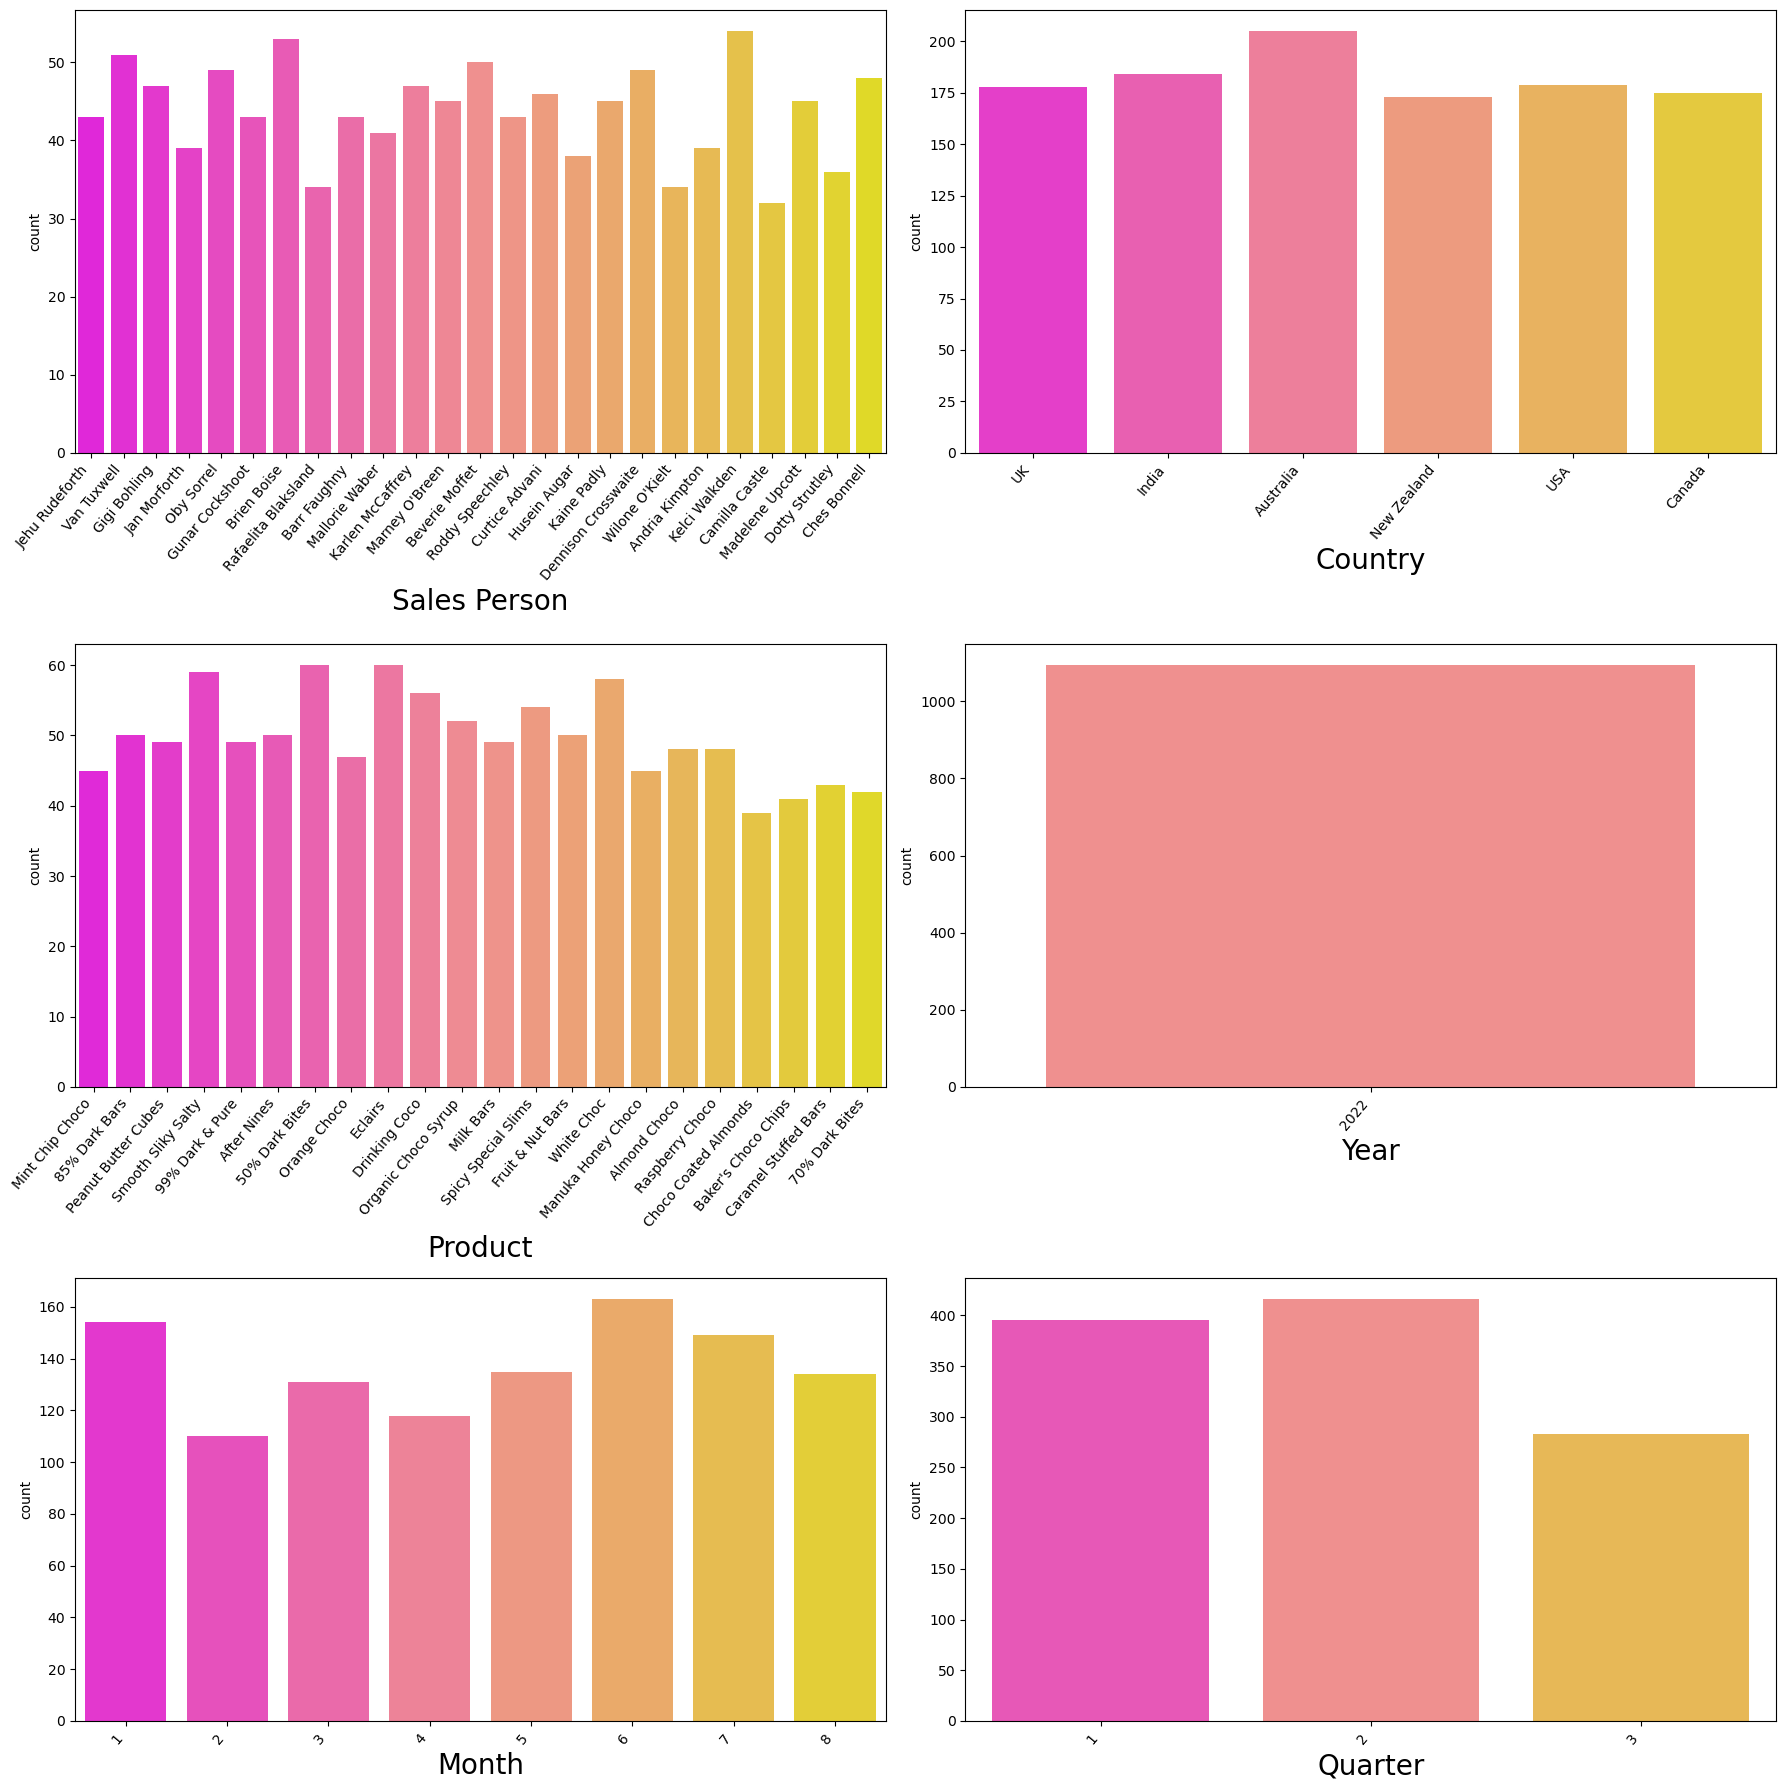

In [19]:
t = 1
plt.figure(figsize = (18,18))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot(data = data, x = i, palette='spring')
    plt.xticks(rotation = 50, ha = 'right')
    plt.xlabel(i, fontsize = 20)

    t = t+1
plt.tight_layout()
plt.show()

Inferences :

- We have data of only 8 months it is till August only.

- All the data comes from year 2022.

- We have less appearance of quarter 3 in the data and it is obvious as well because we only have 2 Months of quarter 3.

- 50 % Dark Bites and Eclairs appears Most in this Data .

- Australia Contributes Significantly in the Chocolate Sales.

## **Bivariate Analysis**

### **Numerical - Numerical Analysis**


#### **Via Regplot**

<function matplotlib.pyplot.show(close=None, block=None)>

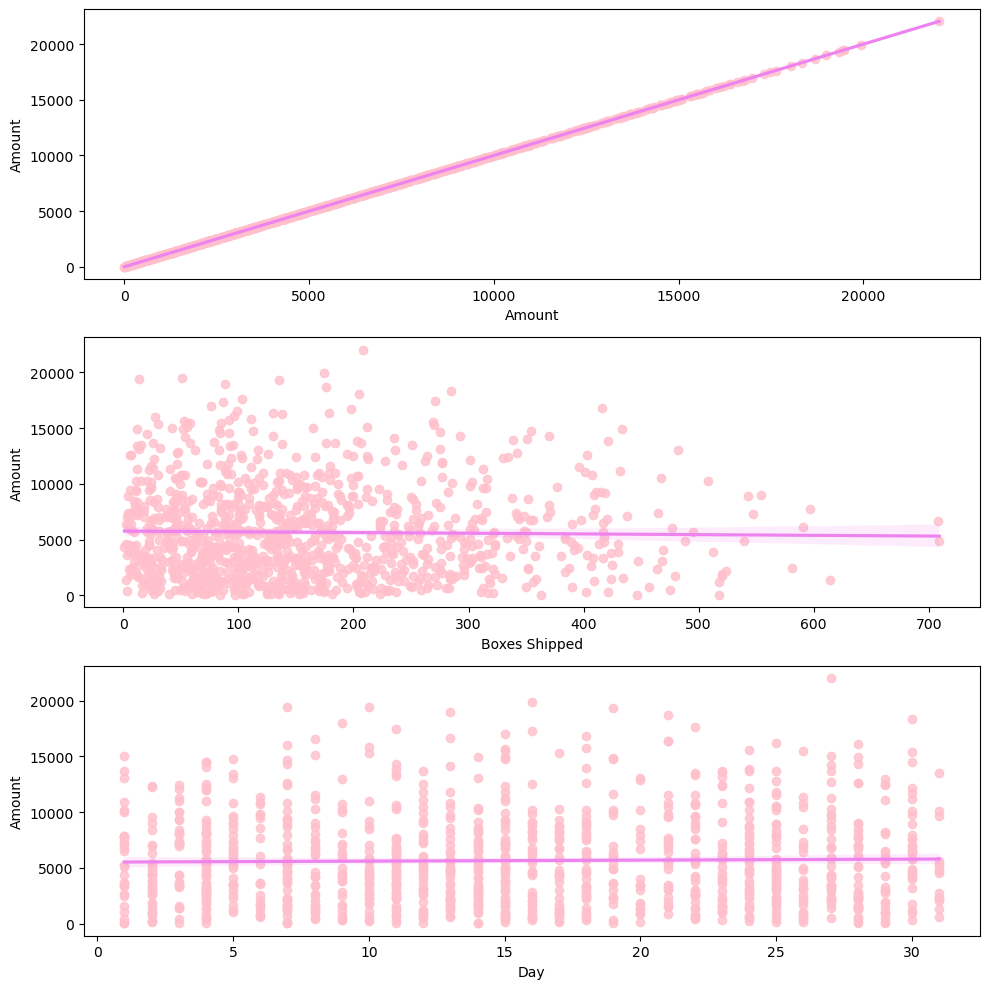

In [20]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,1,t)
    sns.regplot(data = data, x = i, y = 'Amount', color='pink', line_kws={'color' : 'violet'})
    t += 1

plt.tight_layout()
plt.show

Inferences :

- We don't have any specific trend in boxes shipped and day along with Sales.

### **Categorical - Numerical Analysis**

#### **Via Boxplot**

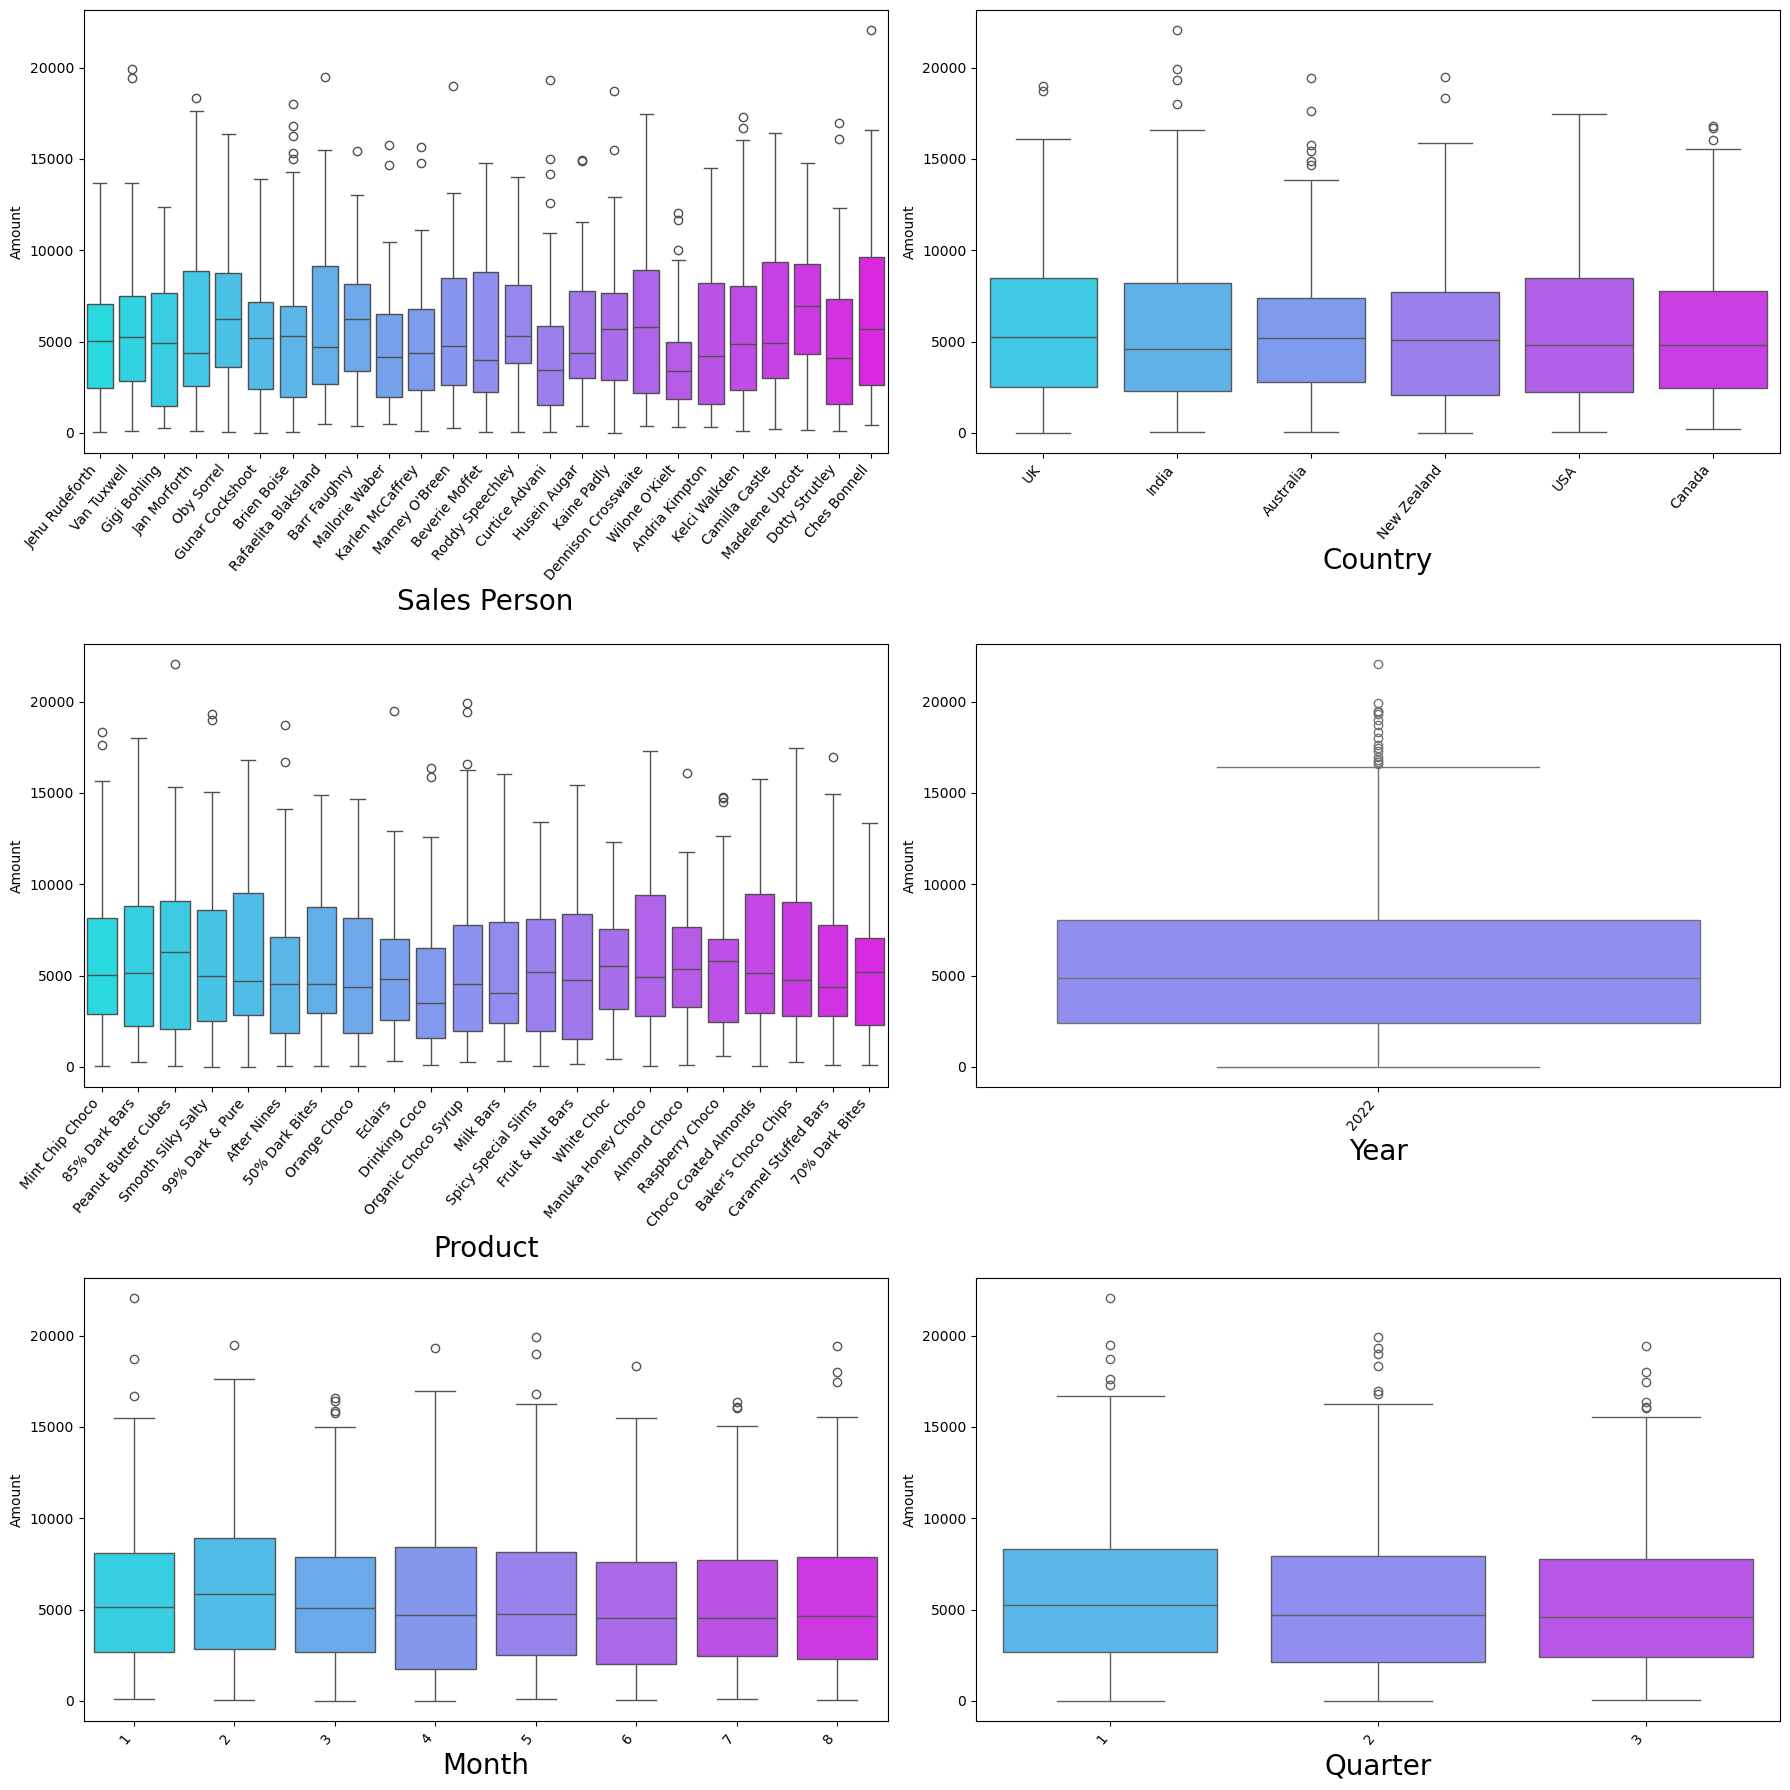

In [21]:
t = 1
plt.figure(figsize = (18,18))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data = data, x = i, y = 'Amount',palette='cool')
    plt.xticks(rotation = 50, ha = 'right')
    plt.xlabel(i, fontsize = 20)

    t = t+1
plt.tight_layout()
plt.show()

### **Categorical - Numerical Analysis**

#### **Via Barplot**

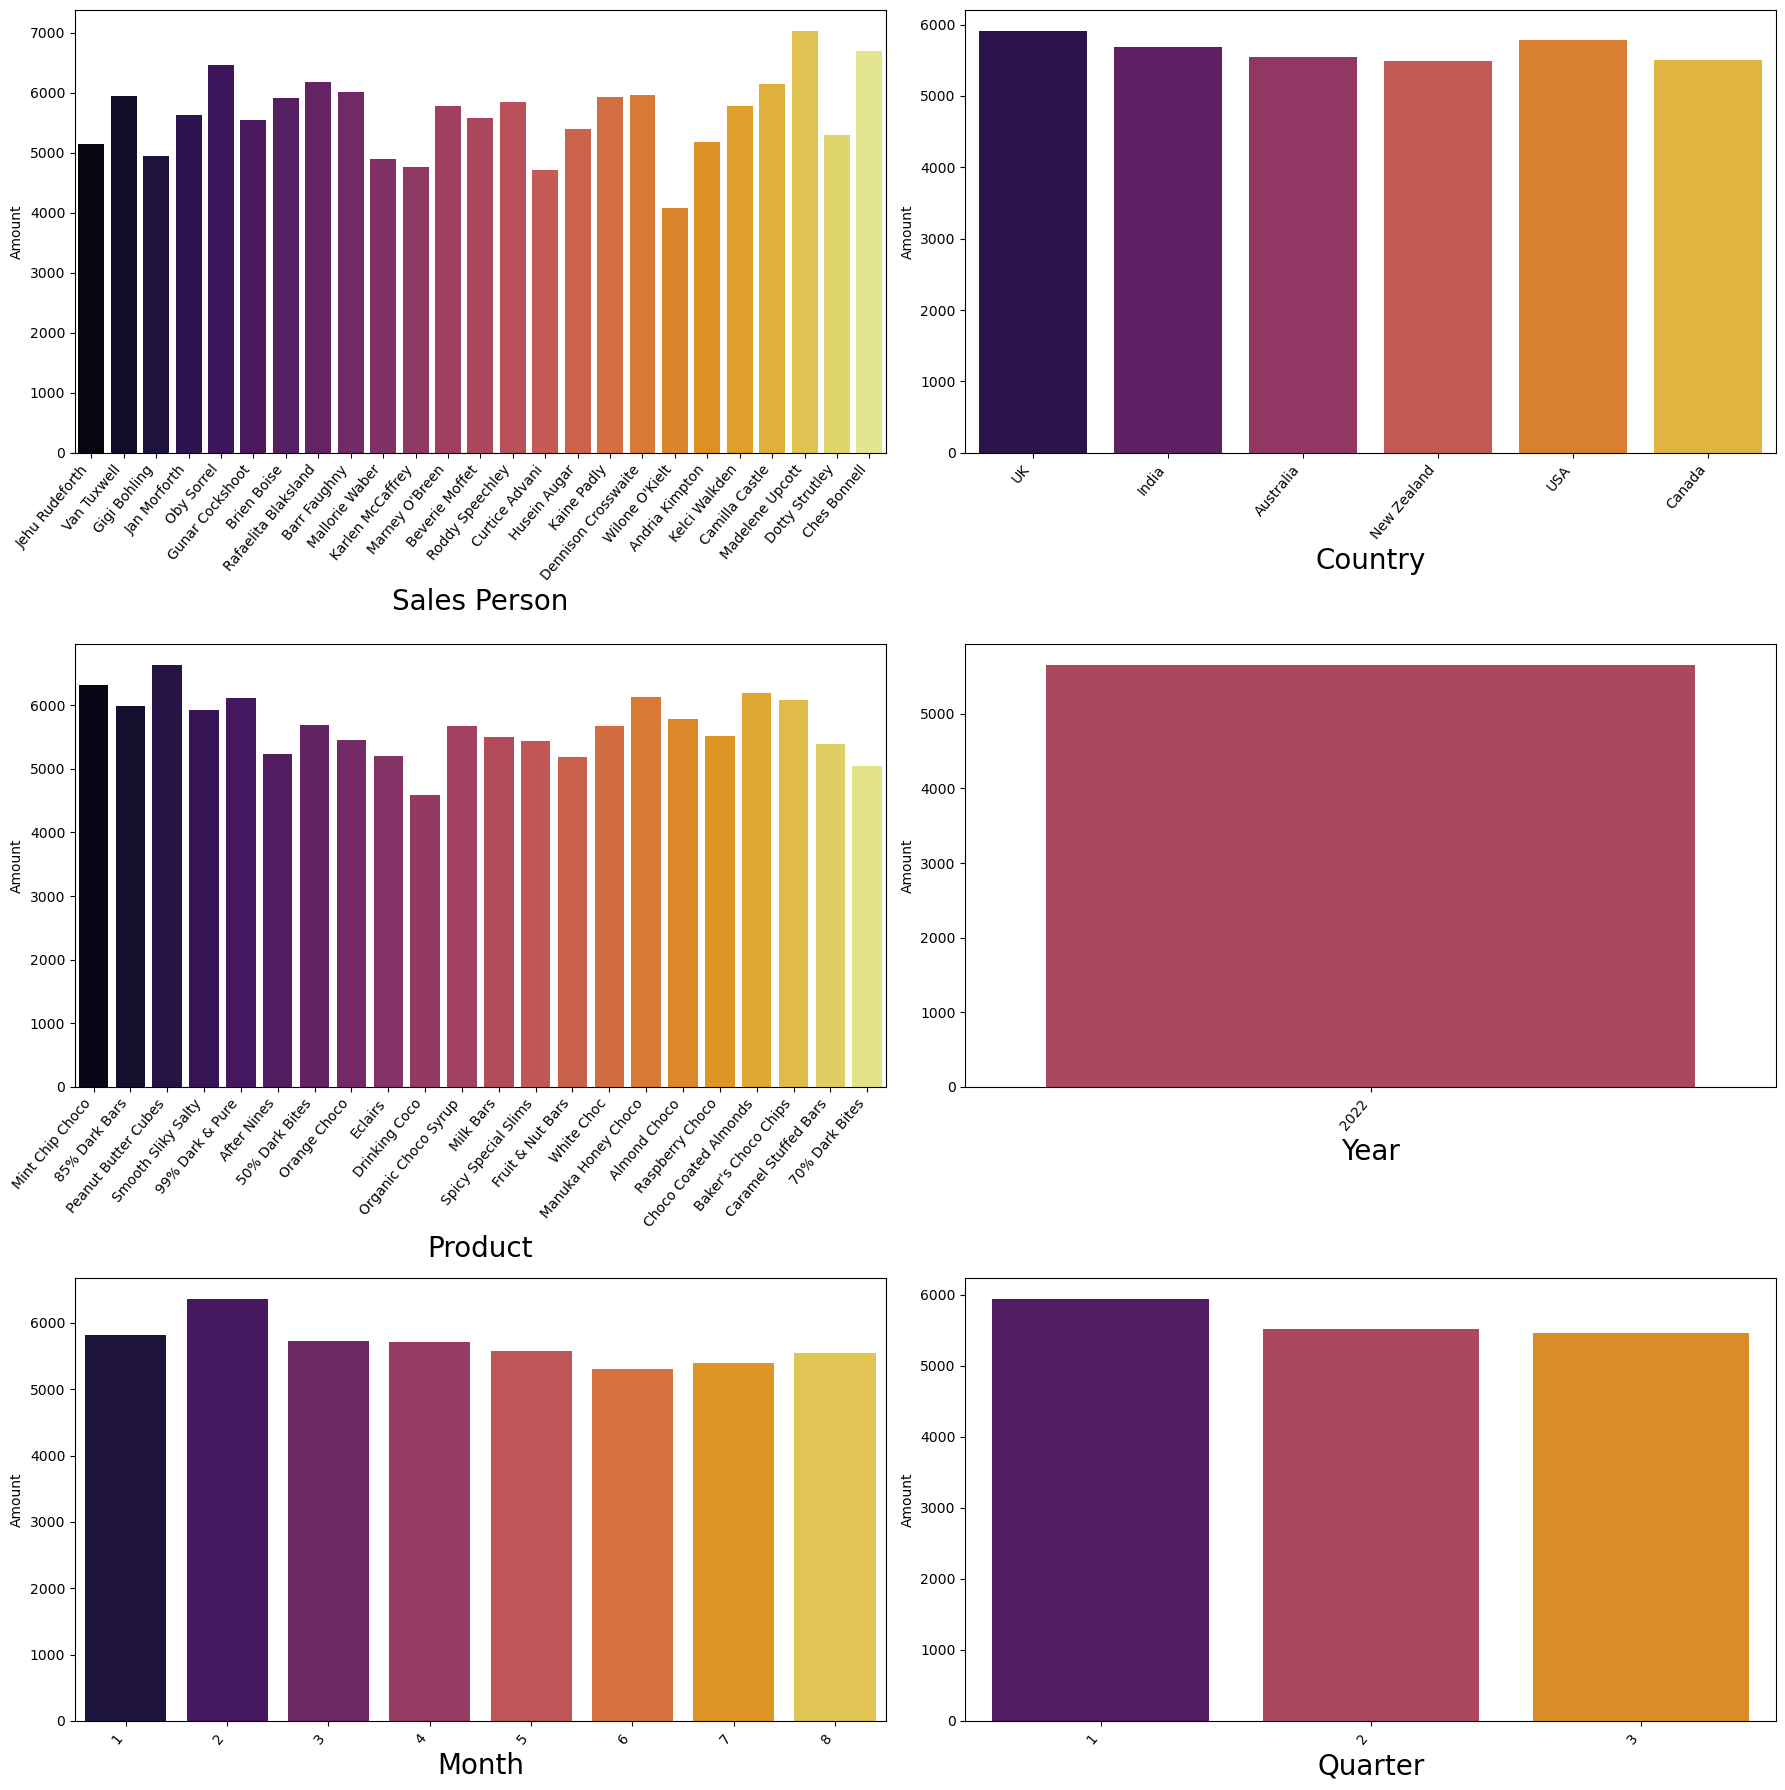

In [22]:
t = 1
plt.figure(figsize = (18,18))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.barplot(data = data, x = i, y = 'Amount',palette='inferno', ci = None)
    plt.xticks(rotation = 50, ha = 'right')
    plt.xlabel(i, fontsize = 20)

    t = t+1
plt.tight_layout()
plt.show()

Inferences :

- Madelene Upcott is a sales Person who deliver chocolate of maximum Amount.

- UK and USA are the highest Contributer in chocolate Sales although there is marginally dfference between other COuntries.

- Maximum Sales By Amount is given By Peanut Butter Cubes.

- Quarter 1 has highest Sales and same for Month of February.

- Although we don't have data from the whole quarter 3 but still there is not much difference between sales in quarter 2 and 3.

## **Statistical Analysis**

In [23]:
from scipy import stats

In [24]:
Ho = 'There is No Significant Relation Between This Column and Amount Column'

Ha = 'There is a Significant Relation Between This Column and Amount Column'


test_stat, pval = stats.ttest_ind(data['Amount'], data['Boxes Shipped'])


if pval > 0.05:
    print('We fail to reject Null Hypothesis')
    print(Ho)

else:
    print('We Reject The Null Hypothesis')
    print(Ha)

We Reject The Null Hypothesis
There is a Significant Relation Between This Column and Amount Column


In [25]:
Ho = 'There is No Significant Relation Between This Column and Amount Column'

Ha = 'There is a Significant Relation Between This Column and Amount Column'


test_stat, pval = stats.ttest_ind(data['Amount'], data['Day'])


if pval > 0.05:
    print('We fail to reject Null Hypothesis')
    print(Ho)

else:
    print('We Reject The Null Hypothesis')
    print(Ha)

We Reject The Null Hypothesis
There is a Significant Relation Between This Column and Amount Column


In [32]:
cat_cols = ['Sales Person', 'Country', 'Product',
       'Month','Quarter']

for i in cat_cols:
    Ho = f'There is no significant relation between rating and {i} columns'
    Ha = f'There is significant relation between rating and {i} columns'

    magics = [data['Amount'][data[i] == j] for j in data[i].unique()]


    test_stat, pval = stats.f_oneway(*magics)

    print(f'P Value = {pval}')

    if pval >= 0.05:
        print('We fail to reject the Null Hypo')
        print('So,')
        print(Ho)

    else:
        print('We reject the Null Hypo')
        print('So,')
        print(Ha)


P Value = 0.3241698015434576
We fail to reject the Null Hypo
So,
There is no significant relation between rating and Sales Person columns
P Value = 0.9115792692956854
We fail to reject the Null Hypo
So,
There is no significant relation between rating and Country columns
P Value = 0.8648765022207061
We fail to reject the Null Hypo
So,
There is no significant relation between rating and Product columns
P Value = 0.6055219105446129
We fail to reject the Null Hypo
So,
There is no significant relation between rating and Month columns
P Value = 0.22447054564255015
We fail to reject the Null Hypo
So,
There is no significant relation between rating and Quarter columns


Inferences :
- Significant Columns are --> Boxes shipped, Day


ALTHOUGH DUE TO SMALL SAMPLE SIZE OUR STATISTICAL TEST MIGHT GET AFFECTED

## **Null Value Treatment**

In [34]:
data.isnull().sum().sum()

0

## **Duplicate Value Detection**

In [35]:
data.duplicated().sum()

0